## Importing necessary Libraries

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from IPython.display import Markdown, display
from IPython.display import display, HTML

In [21]:
py.init_notebook_mode(connected = True)
sns.set_style('darkgrid')
plt.style.use('dark_background')

## Analyzing and cleaning

In [22]:
df = pd.read_csv(r"D:\DataScienceBoiiii\Datasets\crops_kag\yield_df.csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [23]:
# Dropping irrelevent columns
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [24]:
# Making the data clearer to understand
df.rename(columns  = {'Area': 'Country'}, inplace = True)

## Exploratory Data Analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [26]:
df['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [28]:
df.describe(include = 'object')

,Country,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


In [29]:
summary = """
<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #333333; color: #FFFFFF; border-radius: 5px;">
    <b>Key Observations:</b><br><br>
    - The most frequent country in the dataset is <b>India</b>.<br><br>
    - The most frequent item in the dataset is <b>Potato</b>.<br><br>
</div>
"""

display(HTML(summary))

In [30]:
df.groupby(['Country'], sort = True)[['hg/ha_yield']].sum().nlargest(10, 'hg/ha_yield')

,hg/ha_yield
Country,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


In [31]:
summary = """
<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #333333; color: #FFFFFF; border-radius: 5px;">
    <b>Key Observations:</b><br><br>
    - India has the highest crop yields, particularly for Cassava with a yield of 142,810,624 hg/ha.<br><br>
    - Potatoes also see significant production in India, with a yield of 92,122,514 hg/ha.<br><br>
</div>
"""

display(HTML(summary))


In [32]:
df.groupby(['Item', 'Country'], sort = True)['hg/ha_yield'].sum().nlargest(10)

Item            Country       
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

In [33]:
summary = """
<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #333333; color: #FFFFFF; border-radius: 5px;">
    <b>Key Observations:</b><br><br>
    - India is a leading producer of Cassava with a yield of 142,810,624 hg/ha.<br><br>
    - India also has a significant yield of 92,122,514 hg/ha for Potatoes.<br><br>
</div>
"""

display(HTML(summary))


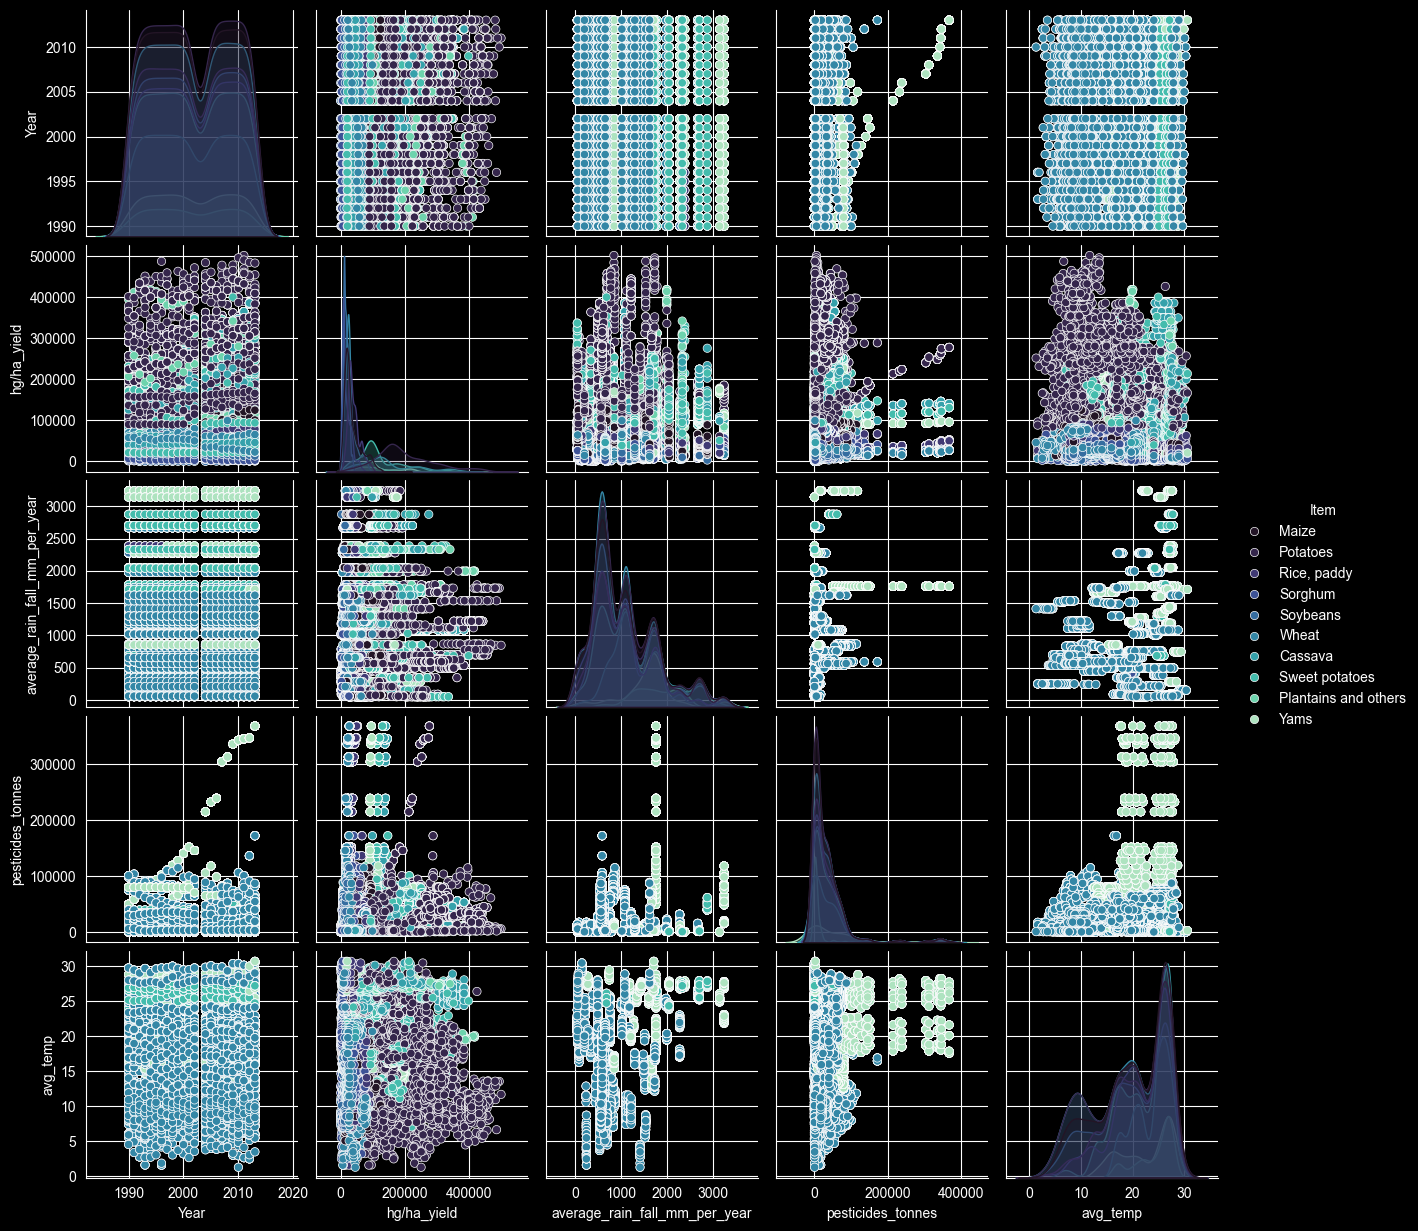

In [34]:
sns.pairplot(data = df, hue = 'Item', kind = 'scatter', palette = 'mako')
plt.show()

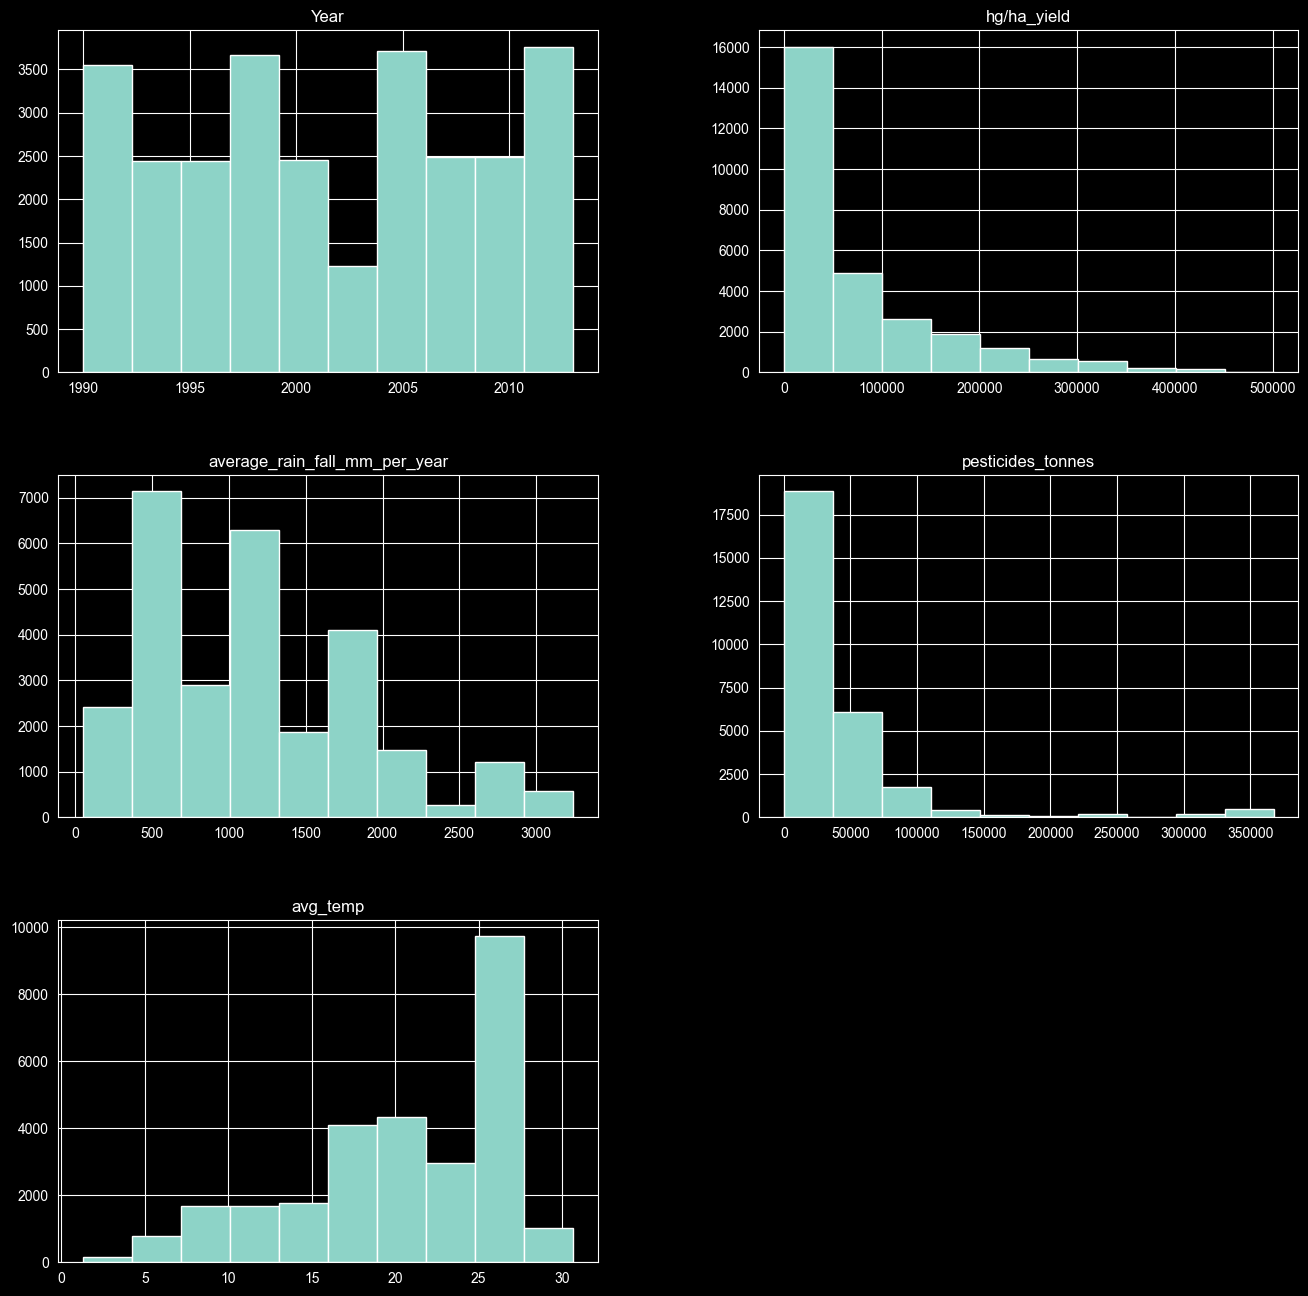

In [35]:
df.hist(figsize = (16, 16));

In [36]:
summary = """
<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #333333; color: #FFFFFF; border-radius: 5px;">
    <b>Notable Observations:</b><br><br>
    - Most rainfall is between 0 - 2000 mm.<br><br>
    - Most average temperatures are around 25°C.<br><br>
    - Most pesticide use is between 0 - 5000 tons.<br><br>
</div>
"""

display(HTML(summary))

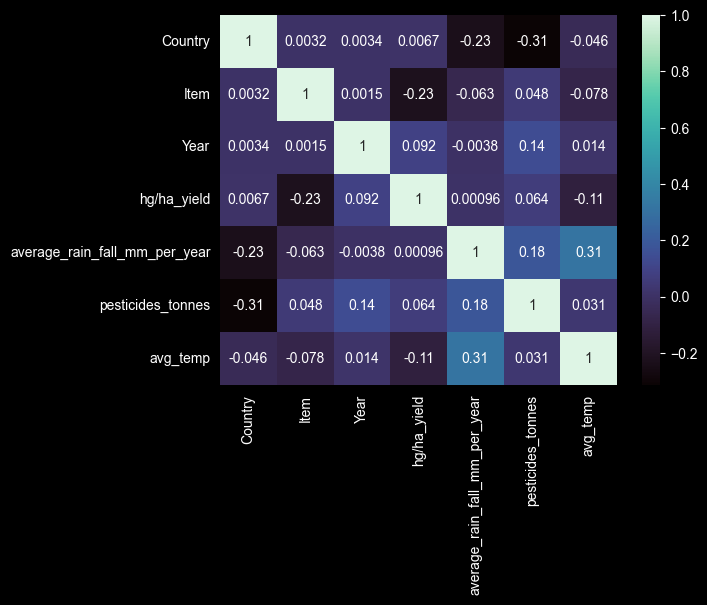

In [37]:
hm = df.copy()

cat_col = hm.select_dtypes(include = ['object']).columns.tolist()
label_encoder = LabelEncoder()

for col in cat_col:
    hm[col] = label_encoder.fit_transform(hm[col])

# COnfusion Matrix
cm = sns.heatmap(hm.corr(), annot = True, cmap = 'mako')
plt.show()

In [38]:
summary = """
<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #333333; color: #FFFFFF; border-radius: 5px;">
    <b>Key Observations:</b><br><br>
    - There is a strong correlation between countries and pesticide use.<br><br>
    - This correlation could be influenced by country-specific regulations on pesticide use.<br><br>
    - Local pest prevalence may also contribute to higher pesticide usage in certain countries.<br><br>
</div>
"""

display(HTML(summary))

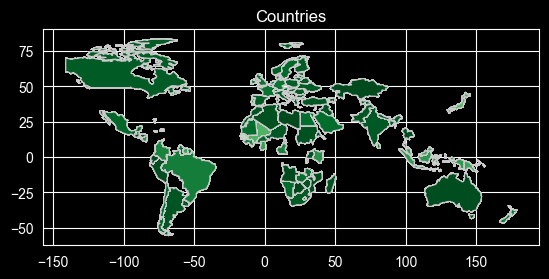

In [39]:
# Maps of the countries in the dataset
geojason_url = 'https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson'
data = gpd.read_file(geojason_url)

merged_data = data.merge(df, left_on = 'NAME', right_on = 'Country', how = 'left')

merged_data.plot(column = 'hg/ha_yield', cmap = 'Greens_r', linewidth = 0.8,edgecolor = '0.8')
plt.title('Countries')
plt.show()

In [40]:
summary = """
<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #333333; color: #FFFFFF; border-radius: 5px;">
    <b>Notable Observation:</b><br>
    - China, USA, and Russia are not in the dataset.<br>
    - These countries are among the top producers of agricultural commodities.<br>
</div>
"""

display(HTML(summary))

In [41]:
del merged_data
del data

## Affect of Pesticide Use on Yield

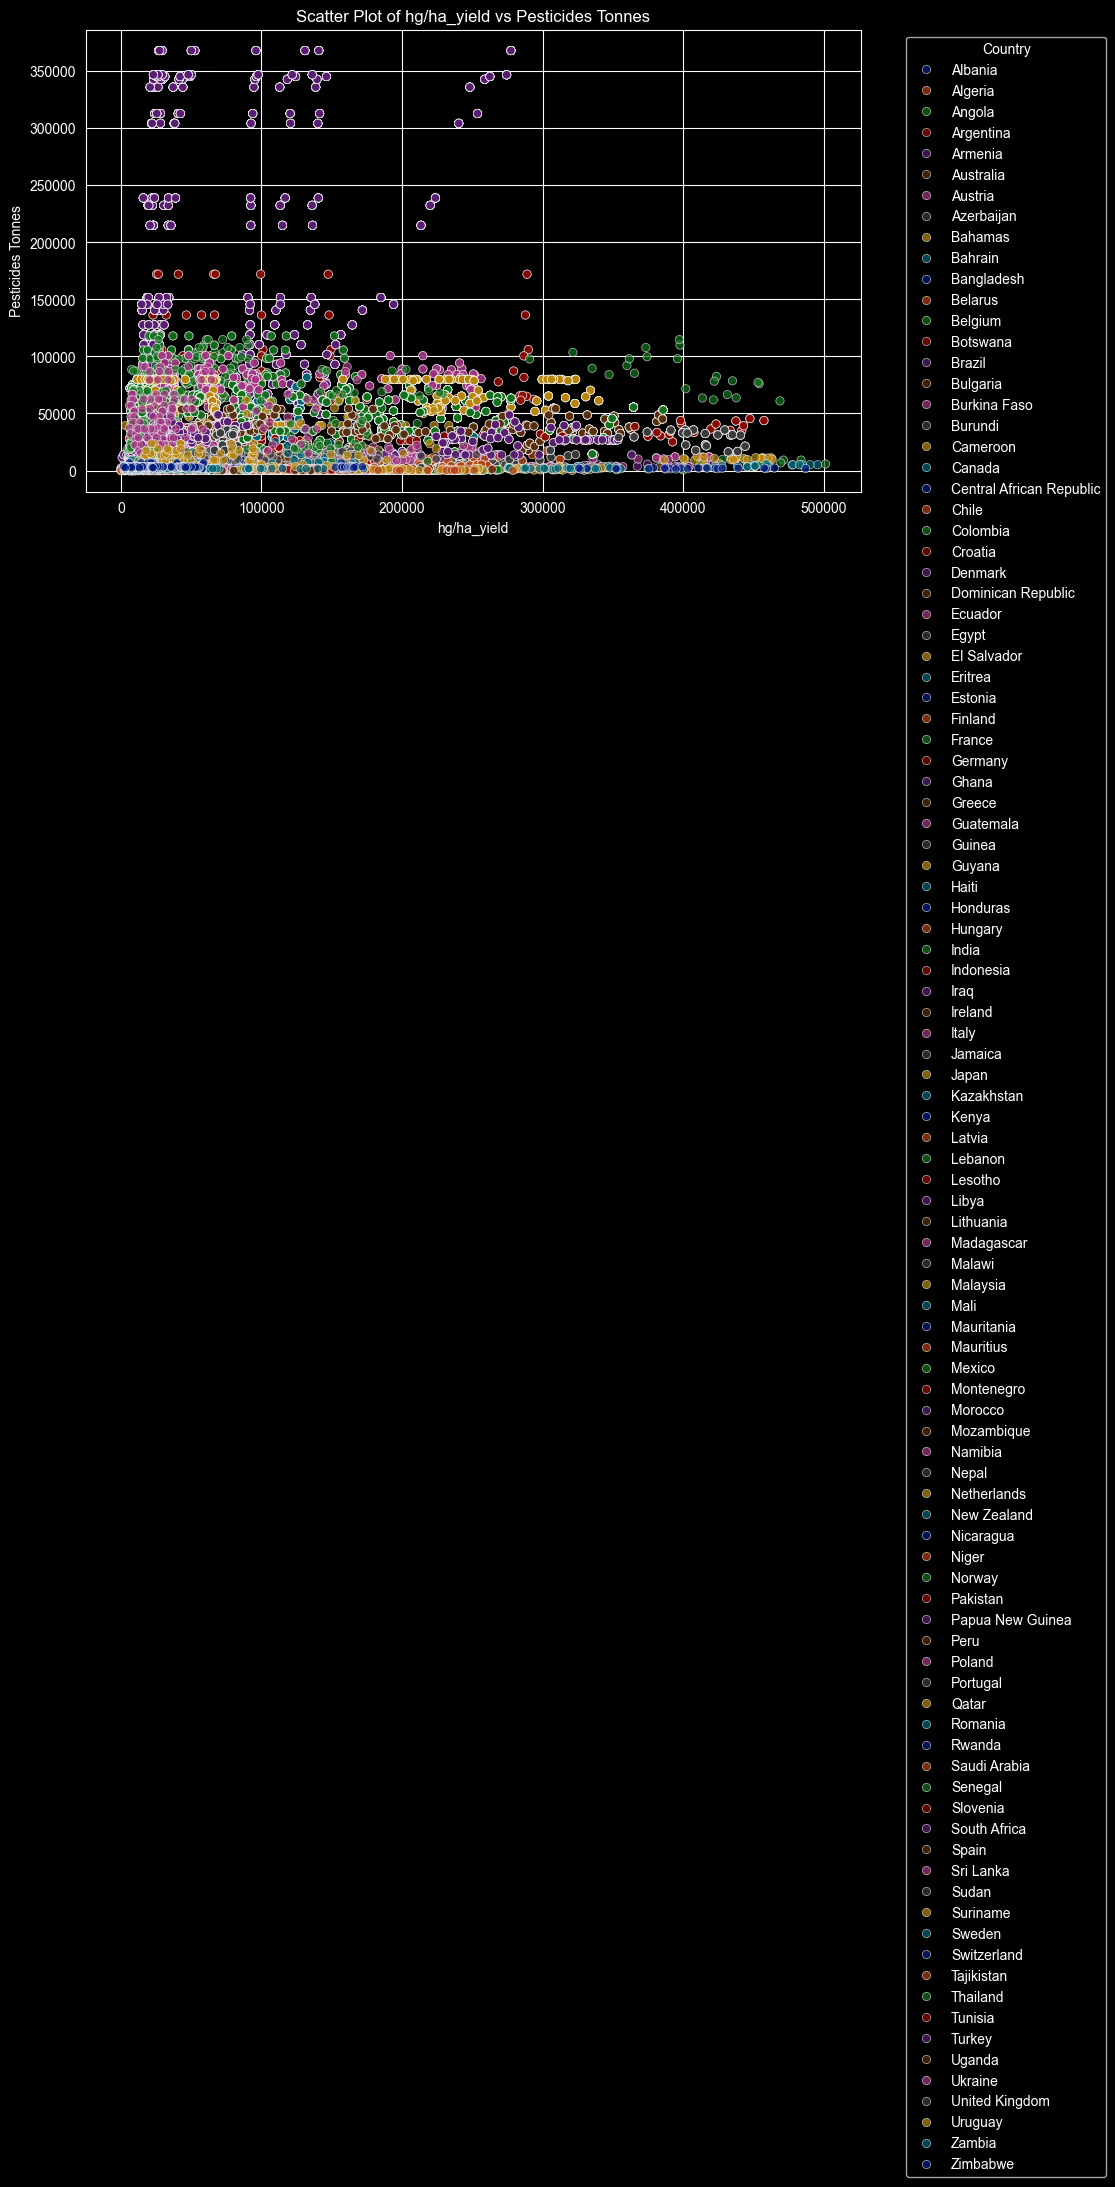

In [42]:
plt.figure(figsize=(10, 6))  # Optional: set figure size
sns.scatterplot(data=df, x='hg/ha_yield', y='pesticides_tonnes', hue='Country', palette='dark', alpha=0.7)

plt.title('Scatter Plot of hg/ha_yield vs Pesticides Tonnes')
plt.xlabel('hg/ha_yield')
plt.ylabel('Pesticides Tonnes')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional: adjust legend position
plt.grid(True)
plt.show()

In [43]:
summary = """
<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #333333; color: #FFFFFF; border-radius: 5px;">
    <b>Notable Observation:</b><br>
    - Seems like the use of pesticides doesn't affect crop yield as much after all.<br>
</div>
"""

display(HTML(summary))

## Making Visualisations Simpler With Dropdowns

In [44]:
import ipywidgets as widgets
from IPython.display import display

### Countries vs Crops Plots

In [45]:
area_dropdown = widgets.Dropdown(options=df['Country'].unique(), description='Country:')
item_dropdown = widgets.Dropdown(options=df['Item'].unique(), description='Crop:')

def plot_data(area, item):
    plt.figure(figsize=(10,6))
    temp_df = df[(df['Country'] == area) & (df['Item'] == item)]
    plt.plot(temp_df['Year'], temp_df['hg/ha_yield'])
    plt.title(f'hg/ha_yield over the years for {item} in {area}')
    plt.xlabel('Year')
    plt.ylabel('hg/ha_yield')
    plt.grid(True)
    plt.show()

# Using interactive function to automatically update the plot
widgets.interactive(plot_data, area=area_dropdown, item=item_dropdown)


interactive(children=(Dropdown(description='Country:', options=('Albania', 'Algeria', 'Angola', 'Argentina', '…

In [46]:
country_dropdown = widgets.Dropdown(options=df['Country'].unique(), description='Country:')

# Function to plot data
def plot_data(country):
    plt.figure(figsize=(10,6))
    temp_df = df[df['Country'] == country]
    plt.plot(temp_df['Year'], temp_df['pesticides_tonnes'])
    plt.title(f'Pesticides Tonnes over the years in {country}')
    plt.xlabel('Year')
    plt.ylabel('Pesticides Tonnes')
    plt.grid(True)
    plt.show()

# Using interactive function to automatically update the plot
widgets.interactive(plot_data, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=('Albania', 'Algeria', 'Angola', 'Argentina', '…

# Training

In [32]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [33]:
# Handling categorical figures using OneHOt Encoding:
categorical_features = ['Country', 'Item']
numerical_features = ['Year', 'average_rain_fall_mm_per_year',
                     'pesticides_tonnes', 'avg_temp']
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [34]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

## Machine Learning

In [35]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=16)),
    ('Random Forest', RandomForestRegressor(random_state = 16)),
    ('Extra Trees', ExtraTreesRegressor(random_state = 16)),
    ('Suppport Vector Machine', SVR())
]

In [36]:
# Finally, Time toTrain Each Model
for name, model in models:
    # Creating a pipeline
    pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('model', model)])
    # Training the model
    pipeline.fit(X_train, y_train)

    # Making Predictions
    y_pred = pipeline.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Error: {r2}\n')

Linear Regression:
Mean Squared Error: 1811141642.35918
Mean Absolute Error: 29319.18360360804
R^2 Error: 0.7488831080185298

Decision Tree:
Mean Squared Error: 137319919.08355463
Mean Absolute Error: 3649.387325190299
R^2 Error: 0.9809604337502331

Random Forest:
Mean Squared Error: 70471917.54685166
Mean Absolute Error: 3266.0029208709507
R^2 Error: 0.9902289867934966

Extra Trees:
Mean Squared Error: 53494047.91281658
Mean Absolute Error: 2446.5790210656755
R^2 Error: 0.9925829881345579

Suppport Vector Machine:
Mean Squared Error: 8627720942.048117
Mean Absolute Error: 56339.104670214285
R^2 Error: -0.19624352793766686



In [47]:
summary = """
<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #333333; color: #FFFFFF; border-radius: 5px;">
    <b>Model Evaluation Summary:</b><br><br>
    - <b>Linear Regression:</b><br>
        - The model is not very accurate as shown by high errors (MSE and MAE). It can explain about 75% of the variation in the data.<br><br>
    - <b>Decision Tree:</b><br>
        - This model performs better than Linear Regression, with lower errors, and it explains about 98% of the data's variation.<br><br>
    - <b>Random Forest:</b><br>
        - This model further improves on Decision Tree with even lower errors, making it stronger in predicting the data.<br><br>
    - <b>Extra Trees:</b><br>
        - Extra Trees is the best performer, with the lowest errors and the most accurate predictions.<br><br>
    - <b>Support Vector Machine:</b><br>
        - This model performs the worst with very high errors, showing a poor fit to the data and explaining very little of the variation.<br>
</div>
"""

display(HTML(summary))

### Hyperparameter Tuning and Model Evaluation with GridSearchCV

In [135]:
from sklearn.model_selection import GridSearchCV

# Defining the model
model = ExtraTreesRegressor(random_state=0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Defining the hyperparameters to tune
param_grid = {
   'model__n_estimators': [50, 100, 200],
   'model__max_depth': [None, 10, 20, 30],
   'model__min_samples_split': [2, 5, 10],
   'model__min_samples_leaf': [1, 2, 4],
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_

# Printing the best parameters
print(f'Best parameters: {best_params}')

# Evaluating the model with the best parameters
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}\n')

Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Mean Squared Error: 53014439.57593285
Mean Absolute Error: 2426.53487519915
R^2 Score: 0.9926494863874332



In [48]:
summary = """
<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #333333; color: #FFFFFF; border-radius: 5px;">
    <b>Model Tuning and Evaluation Summary:</b><br><br>
    - <b>Extra Trees Regressor:</b><br>
        - This model was selected for tuning with different settings to find the best one.<br>
        - The <b>best settings</b> for the model included:
            - <b>Max depth:</b> No limit on the depth of trees.
            - <b>Minimum samples for splitting a node:</b> 2.
            - <b>Minimum samples for leaf nodes:</b> 1.
            - <b>Number of trees:</b> 100 trees.<br><br>
    - <b>Model Performance:</b><br>
        - The <b>Mean Squared Error (MSE)</b> is 53,014,439, showing the model’s prediction error.<br>
        - The <b>Mean Absolute Error (MAE)</b> is 2,426, indicating the average magnitude of error.<br>
        - The <b>R^2 Score</b> is 0.99, meaning the model can explain 99% of the variance in the data, indicating a very good fit.<br>
</div>
"""

display(HTML(summary))
